# Chapter 14: Dimension Reduction of Matrix Data

## 14.1 Clustering 2D Data in One Dimension

In [2]:
# Simulating a range of heights
import numpy as np
heights = np.arange(60, 78, 0.1)

In [3]:
# Simulating weights using heights
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size)
weights = 4 * heights - 130 + random_fluctuations

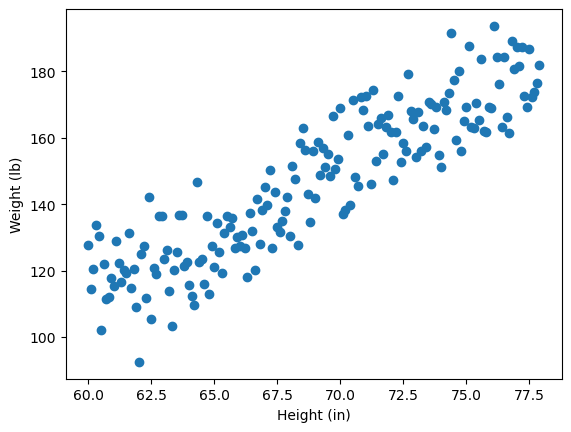

In [4]:
# Plotting 2D measurements
import matplotlib.pyplot as plt
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.show()

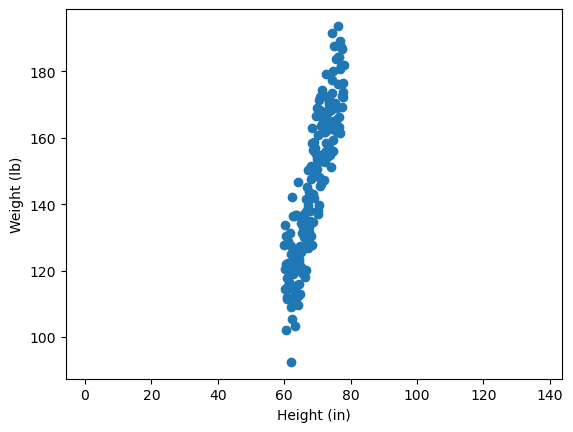

In [5]:
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.axis('equal')
plt.show()

### 14.1.1 Reducing Dimensions Using Rotation

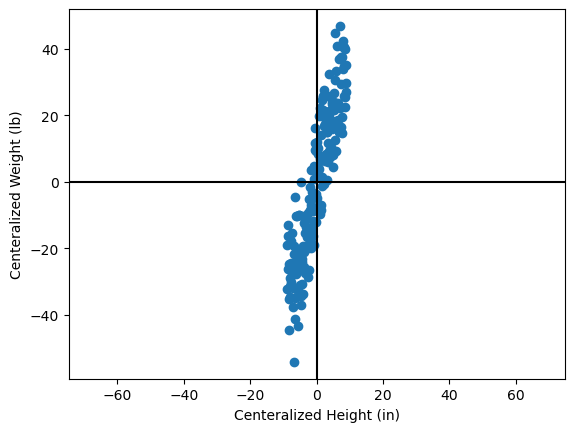

In [6]:
# Centering the measurements at the origin
centered_data = np.array([heights - heights.mean(), weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('Centeralized Height (in)')
plt.ylabel('Centeralized Weight (lb)')
plt.axis('equal')
plt.show()

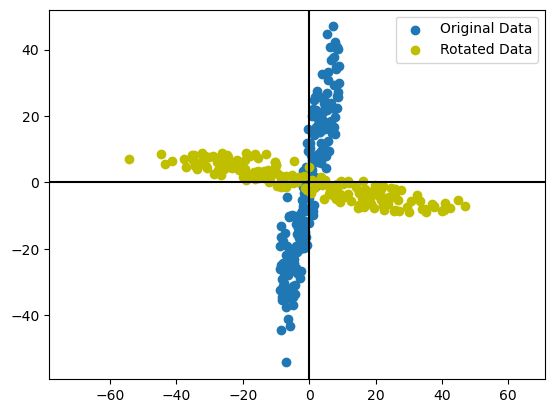

In [7]:
# Rotating centered_data by 90 degrees (using matrix rotation transformation)
from math import sin, cos
angle = np.radians(-90)
rotation_matrix = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
rotated_data = rotation_matrix @ centered_data
plt.scatter(centered_data[0], centered_data[1], label='Original Data')
plt.scatter(rotated_data[0], rotated_data[1], c='y', label='Rotated Data')
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.legend()
plt.axis('equal')
plt.show()

In [8]:
# Penalizing vertical y-values
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_var = data[1].var()
    penalty = data[1] @ data[1] / data[0].size
    assert round(y_var, 14) == round(penalty, 14)
    print(f"The y-axis variance for the {data_label} data is {y_var:.2f}")

The y-axis variance for the unrotated data is 519.82
The y-axis variance for the rotated data is 27.00


In [9]:
# Measuring rotational x-axis variance
for data_label, data in zip(data_labels, data_list):
    x_var = data[0].var()
    print(f"The x-axis variance for the {data_label} data is {x_var:.2f}")

The x-axis variance for the unrotated data is 27.00
The x-axis variance for the rotated data is 519.82


In [10]:
# Confirming the conservation of total variance
total_variance = centered_data[0].var() + centered_data[1].var()
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

In [11]:
# Exploring the percent coverage of axis variance
for data_label, data in zip(data_labels, data_list):
    percent_x_axis_var = 100 * data[0].var() / total_variance
    percent_y_axis_var = 100 * data[1].var() / total_variance
    print(f"In the {data_label} data, {percent_x_axis_var:.2f}% of the total variance is distributed across the x-axis")
    print(f"The remaining {percent_y_axis_var:.2f}% of the total variance is distributed across the y-axis\n")

In the unrotated data, 4.94% of the total variance is distributed across the x-axis
The remaining 95.06% of the total variance is distributed across the y-axis

In the rotated data, 95.06% of the total variance is distributed across the x-axis
The remaining 4.94% of the total variance is distributed across the y-axis



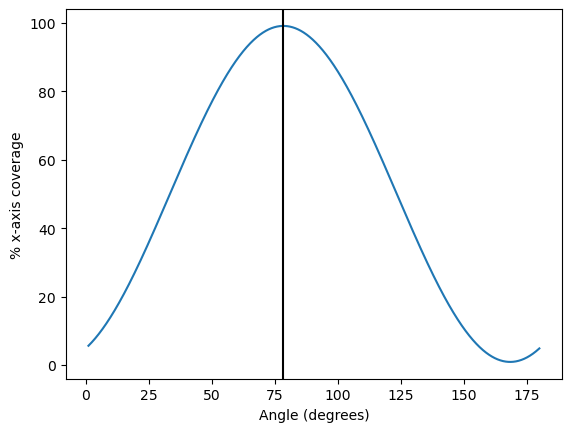

The horizontal variance is maximized to approximately 541 after a 78.3 degree rotation.
That rotation distributes 99.08% of the total variance onto the x-axis


In [12]:
# Maximizing horizontal dispersion
def rotate(angle, data=centered_data):
    angle = np.radians(-angle)
    rotation_matrix = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    return rotation_matrix @ data

angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]

np_x_variances = np.array(x_variances)
percent_x_variances = 100 * np_x_variances / total_variance
optimal_index = np.argmax(percent_x_variances)
optimal_angle = angles[optimal_index]
plt.plot(angles, percent_x_variances)
plt.axvline(optimal_angle, c='k')
plt.xlabel('Angle (degrees)')
plt.ylabel('% x-axis coverage')
plt.show()

max_coverage = percent_x_variances[optimal_index]
max_x_var = x_variances[optimal_index]

print(f"The horizontal variance is maximized to approximately {int(max_x_var)} after a {optimal_angle:.1f} degree rotation.")
print(f"That rotation distributes {max_coverage:.2f}% of the total variance onto the x-axis")

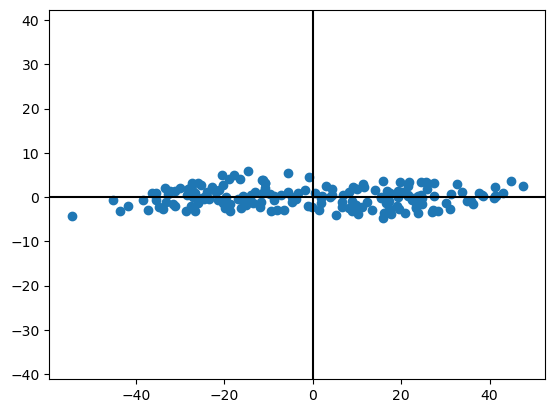

In [13]:
# Plotting rotated data with high x-axis coverage
best_rotated_data = rotate(optimal_angle)
plt.scatter(best_rotated_data[0], best_rotated_data[1])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.axis('equal')
plt.show()

In [14]:
# Reducing the rotated data to 1D for the purposes of clustering
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size / 3)
small_cutoff = max(sorted_x_values[:cluster_size])
large_cutoff = min(sorted_x_values[-cluster_size:])
print(f"A 1D threshold of {small_cutoff:.2f} separates the small-sized and medium-sized customers.")
print(f"A 1D threshold of {large_cutoff:.2f} separates the medium-sized and large-sized customers.")

A 1D threshold of -14.61 separates the small-sized and medium-sized customers.
A 1D threshold of 15.80 separates the medium-sized and large-sized customers.


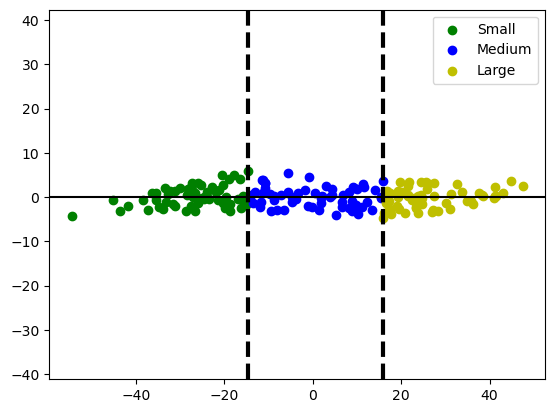

In [15]:
# Plotting horizontal customer data separated into three segments
def plot_customer_segments(horizontal_2d_data):
    small, medium, large = [], [], []
    cluster_labels = ['Small', 'Medium', 'Large']
    for x_value, y_value in horizontal_2d_data.T:
        if x_value <= small_cutoff:
            small.append([x_value, y_value])
        elif small_cutoff < x_value <= large_cutoff:
            medium.append([x_value, y_value])
        else:
            large.append([x_value, y_value])
        
    for i, cluster in enumerate([small, medium, large]):
        cluster_x_vlaues, cluster_y_values = np.array(cluster).T
        plt.scatter(cluster_x_vlaues, cluster_y_values, color=['g', 'b', 'y'][i], label=cluster_labels[i])

    plt.axhline(0, c='k')
    plt.axvline(large_cutoff, c='k', linewidth=3, linestyle='--')
    plt.axvline(small_cutoff, c='k', linewidth=3, linestyle='--')
    plt.axis('equal')
    plt.legend()
    plt.show()
        
plot_customer_segments(best_rotated_data)

In [16]:
# Reproducing 2D data from a 1D array
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

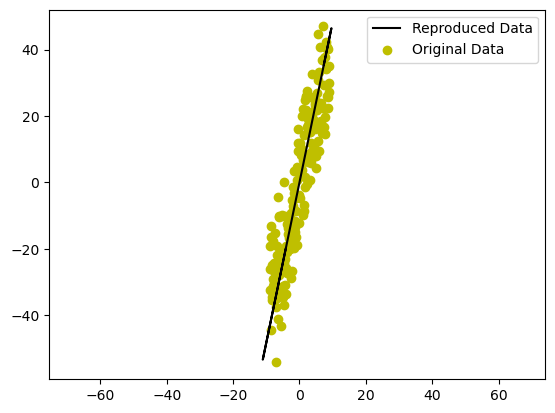

In [17]:
# Plotting reproduced and original data
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='Reproduced Data')
plt.scatter(centered_data[0], centered_data[1], c='y', label='Original Data')
plt.axis('equal')
plt.legend()
plt.show()

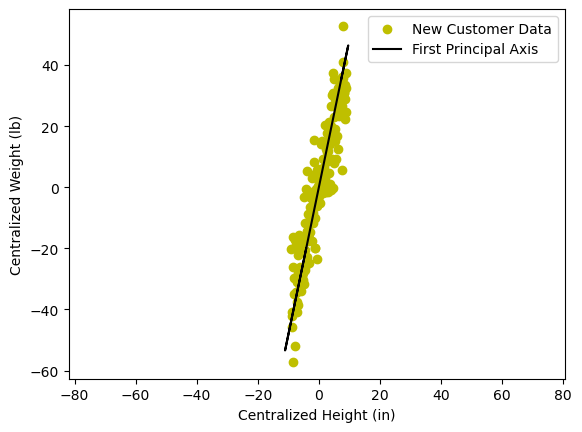

In [18]:
# First Principal Axis: The linear direction in which the data's variance is maximized
# Second Principal Axis: Perpendicular to the first; ot represemts the remaining variance not covered by the first p axis
# Simulating and plotting new customer data
np.random.seed(1)
new_heights = np.arange(60, 78, 0.11)
random_fluctuations = np.random.normal(scale=10, size=new_heights.size)
new_weights = 4 * new_heights - 130 + random_fluctuations
new_centered_data = np.array([new_heights - new_heights.mean(), new_weights - new_weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y', label='New Customer Data')
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='First Principal Axis')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

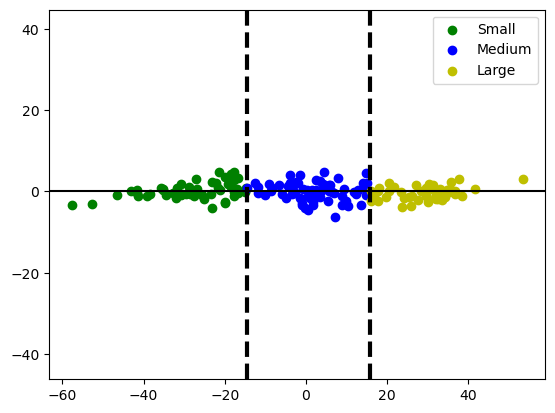

In [19]:
# Reproducing and segmenting our new customer data
new_horizontal_data = rotate(optimal_angle, data=new_centered_data)
plot_customer_segments(new_horizontal_data)

## 14.2 Dimension Reduction using PCA and scikit-learn

In [27]:
# PCA: Principal Component Analysis
# Importing PCA from scikit-learn
from sklearn.decomposition import PCA
from numpy.linalg import norm

In [21]:
# Initializing a pca_model object
pca_object = PCA()

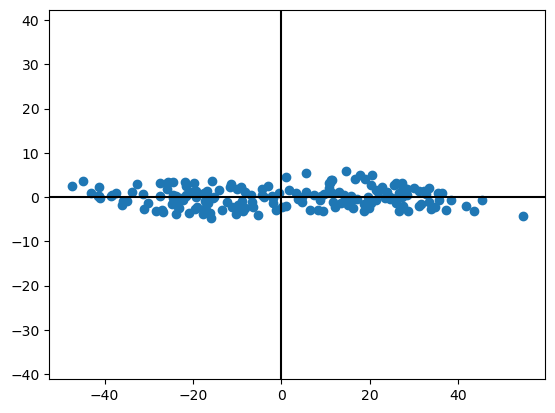

In [24]:
# Running PCA using scikit-learn
pca_transformed_data = pca_object.fit_transform(measurements.T)
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.axis('equal')
plt.show()

In [25]:
# Extracting variance from scikit-learn's PCA output
percent_variance_coverages = 100 * pca_object.explained_variance_ratio_
x_axis_coverage, y_axis_coverage = percent_variance_coverages
print(f"The x-axis of our PCA output covers {x_axis_coverage:.2f}% of the total variance")

The x-axis of our PCA output covers 99.08% of the total variance


In [28]:
# Outputting the first principal component
first_pc = pca_object.components_[0]
magnitude = norm(first_pc)
print(f"Vector {first_pc} points in a direction that covers {x_axis_coverage:.2f}% of the total variance.")
print(f"The vector has a magnitude of {magnitude}.")

Vector [-0.20223994 -0.979336  ] points in a direction that covers 99.08% of the total variance.
The vector has a magnitude of 1.0.


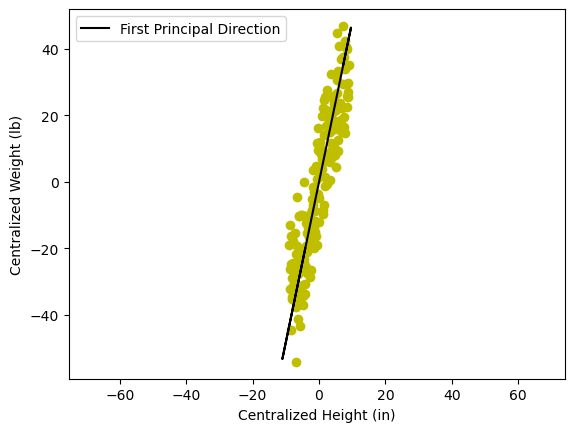

In [29]:
# Streching a unit vector to cover the first principal direction
def plot_streched_vector(v, **kwargs):
    plt.plot([-50 * v[0], 50 * v[0]], [-50 * v[1], 50 * v[1]], **kwargs)
    
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='First Principal Direction')
plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

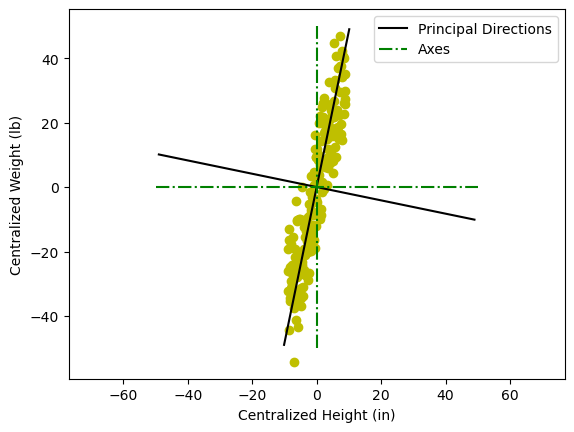

In [30]:
# Plotting principal directions, axes, and data information
principal_components = pca_object.components_
for i, pc in enumerate(principal_components):
    plot_streched_vector(pc, c='k', label='Principal Directions' if i == 0 else None)
    
for i, axis_vector in enumerate([np.array([0,1]), np.array([1, 0])]):
    plot_streched_vector(axis_vector, c='g', linestyle='-.', label='Axes' if i == 0 else None)
    
plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

In [31]:
# Swapping standard axes for principal directions using projection
projections = principal_components @ centered_data
assert np.allclose(pca_transformed_data.T, projections)

PCA Algorithm:  
1. Centralize the input data by subtracting the mean from each data point
2. Compute the dataset's principal components
3. Take the matrix product between the centralized data and the principal components. This swaps the data's standard axes for its principal directions  
  
**First Principal Direction:** The linear direction in which data disperson is maximmized. Swapping the x-axis with the first principal axis reorients the data-set to maximize its spread horizontally. The reorientation can allow for more straightforward 1D clustering.  
**Kth Principal Direction:** The linear direction that maximizes the variance not covered by the first K-1 principal directions  
**Kth Principal Component:** A unit vector representation of the Kth principal direction. This vector can be utilized for directional projection.  
**Projection:** Projecting data onto a principal direction is analogous to swapping a standard axis with that direction. We can project a dataset onto its top K principal directions by taking the matrix product of the centralized dataset with its top K principal components

## 14.3 Clustering 4D data in two dimenstions